# Problem 4 

For this problem, you will be asked to create a dimensionality reduction technique used in the pre-processing step for pattern-classification and other machine learning applications. The modifications you will make to this notebook will test your ability to implement an algorithm you may not have seen before.

Our goal is to develop a linear transformation method that is commonly used for dimensionality reduction like PCA (Principal component analysis). In contrast to PCA, we will implement a “supervised” technique that computes the directions  that will represent the axes that maximize the separation between multiple classes. By the end of this problem you will be able to reduce the dimensions of a $d$-dimensional dataset by projecting it onto a $(k)$-dimensional subspace (where $k<d$). 

## Let's load the data first

We have loaded the required dataset for you in the code below. Go ahead and run the cell. 

In the following dataset - there are 4 numerical columns - `col1, col2, col3, col4` and one `class` column that signifies the class label for each row. 

In [1]:
import sys
sys.path.insert(0, '../resource/asnlib/publicdata/')
import pandas as pd
import numpy as np
np.warnings.filterwarnings('ignore')
r = 2 #rounding factor
df = pd.read_csv('problem4_input.csv')

X = df[['col1', 'col2', 'col3', 'col4']].values
y = df['class'].values

print("Dimesion of dataset: {}".format(df.shape))
df.tail()

Dimesion of dataset: (149, 5)


,col1,col2,col3,col4,class
144,6.7,3.0,5.2,2.3,3
145,6.3,2.5,5.0,1.9,3
146,6.5,3.0,5.2,2.0,3
147,6.2,3.4,5.4,2.3,3
148,5.9,3.0,5.1,1.8,3


## Plotting Histograms of features

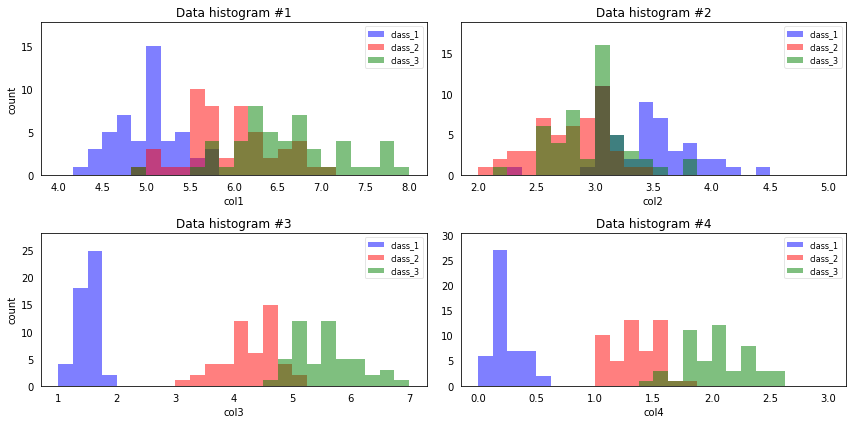

In [2]:
%matplotlib inline
from plot_utils import plot_hist, plot_step
plot_hist(X, y, df)

There are 3 unique classes in the dataset. By just looking at these histograms, we can see that the `col3` and `col4` are better suited as potential features to separate between the three classes. 

#### Important Note

This notebook contains **hidden test cells** which will test your solution on a larger dataset (more rows and class labels). Make sure your solution is generic. 

To help you understand how that larger dataset looks like, you can run the below cells to get a preview.

In [3]:
test_preview = pd.read_csv('test_input_small.csv')
test_preview.head()


,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,class
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,2
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,2
2,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449,2
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701813,2
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,2


In [4]:
test_preview.shape

(13, 10)

**Exercise 1** (0 points): Computing the $d$-dimensional mean vectors.

Complete the `calculate_mean_vector(X,y)` function where - 
1. `X` = $ n \times d$ matrix of input features, where $n$ = number of data points, $d$ = number of features
2. `y` = a vector of length $n$ denoting class labels for the $n$ data points

The function will return a $k \times d$ matrix (2d numpy array) where $k$ = number of unique class. The order in which means appear should be as follows:

$$ \begin{bmatrix} 
\vec\mu_{class \, 1} \\
\vec\mu_{class \,  2} \\
. \\
. \\
\vec\mu_{class \, k}
\end{bmatrix} $$

**Important Note**: 
- Notebook contains **hidden test cells** which will test your solution on a larger dataset (more rows and class labels). Make sure your solution is generic. 

- We will test your solution rounding it to two decimal place. You **do not** need to round.

In [5]:
X[:10]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2]])

In [6]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
def calculate_mean_vector(X,y):
    #Initiate a blank numpy.ndarray object
    mean_vectors = np.zeros((len(set(y)),X.shape[1]))

    for idx, cl in enumerate(set(y)):
        mean_vectors[idx]= np.mean(X[y==cl], axis=0)

    return mean_vectors

mean_vectors = calculate_mean_vector(X,y)
mean_vectors

array([[5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [5.936     , 2.77      , 4.26      , 1.326     ],
       [6.588     , 2.974     , 5.552     , 2.026     ]])

In [8]:
## Dummy Test Cell 1

student_answer = np.round(calculate_mean_vector(X,y),r)
# print(f'Your answer : \n{student_answer}')

teachers_answer = np.round(np.array([[5.00408163, 3.41632653, 1.46530612, 0.24489796],
                            [5.936     , 2.77      , 4.26      , 1.326     ],
                            [6.588     , 2.974     , 5.552     , 2.026     ]]),r)
# print(f'Teachers answer : \n{teachers_answer}')

assert np.array_equal(student_answer, teachers_answer), "Check the answer"

print("*********")
print("Passed dummy test cell")
print("Note : There are hidden test cells that run on a totally different but identical dataset")

*********
Passed dummy test cell
Note : There are hidden test cells that run on a totally different but identical dataset


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Exercise 2** (6 points): Computing estimate of Covariance Matrices

Now, we will compute the two $d\times d$-dimensional matrices: The within-class and the between-class estimates of covariance matrix.

#### 2.1 Within-class (3 points)

Complete the function `get_S_W_matrix(X, y)` that returns the within-class estimate of covariance matrix $S_W$. 

$$ S_w = \sum_{i=1}^{k}S_i$$

$$ \textit{where } \, \,  S_i = \sum_{\textbf x \epsilon D_i} (\textbf {x} - \textbf{m}_i)(\textbf {x} - \textbf{m}_i)^t  \, \, \,  \textit{(covariance matrix estimate for every class 'i')}$$

$$ \textbf{m}_i = \frac{1}{n_i}\sum_{\textbf x \epsilon D_i} \textbf {x}  $$

$D_i$ are data points labeled as class $i$. 
$n_i$ is the number of datapoints in class $i$. 
$k$ is the number of unique classes in the dataset. 
$d$ is the number of features.

Note that $\bf x$ and $\bf m_i$ are vectors.



In [10]:
X.shape

(149, 4)

In [11]:
np.zeros((4, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
(X - mean_vectors[1]).shape

(149, 4)

In [13]:
def get_S_W_matrix(X,y):
    S_W = np.zeros((X.shape[1],X.shape[1]))

    ###
    # Calculate the mean vectors
    mean_vectors = calculate_mean_vector(X, y)
    
    S_cl_to_sum = []
    for idx, cl in enumerate(set(y)):
        # filter on only the X points associated w/ the corresponding class y
        X_di = X[y==cl]
        
        # focus on the mean vector associated with class y
        m_i = mean_vectors[idx]
        
        diff_vec = X_di - m_i
        print(diff_vec.shape)
        S_cl = (diff_vec.T.dot(diff_vec))
        S_cl_to_sum.append(S_cl)
        
    for S in S_cl_to_sum:
        S_W = np.add(S, S_W)
    ###
    
    return S_W

S_W = get_S_W_matrix(X,y)
print(S_W)

(49, 4)
(50, 4)
(50, 4)
[[38.94718367 13.67513469 24.62013878  5.65982041]
 [13.67513469 17.02813878  8.1253551   4.91688163]
 [24.62013878  8.1253551  27.21582041  6.25072653]
 [ 5.65982041  4.91688163  6.25072653  6.17362449]]


In [14]:
## Dummy Test Cell 2.1

student_answer_ex2 = np.round(get_S_W_matrix(X,y),r)
print(f'Your answer : \n{student_answer_ex2}')
assert (type(student_answer_ex2)==np.ndarray), "Check the data type of your result"

teachers_answer_ex2 = np.round(np.array([[38.94718367, 13.67513469, 24.62013878,  5.65982041],
                                         [13.67513469, 17.02813878,  8.1253551 ,  4.91688163],
                                         [24.62013878,  8.1253551 , 27.21582041,  6.25072653],
                                         [ 5.65982041,  4.91688163,  6.25072653,  6.17362449]]),r)
print(f'Teachers answer \n{teachers_answer_ex2}')

assert np.array_equal(student_answer_ex2, teachers_answer_ex2), "Check the answer"

print("*********")
print("Passed dummy test cell")
print("Note : There are hidden test cells that run on a totally different but identical dataset")


(49, 4)
(50, 4)
(50, 4)
Your answer : 
[[38.95 13.68 24.62  5.66]
 [13.68 17.03  8.13  4.92]
 [24.62  8.13 27.22  6.25]
 [ 5.66  4.92  6.25  6.17]]
Teachers answer 
[[38.95 13.68 24.62  5.66]
 [13.68 17.03  8.13  4.92]
 [24.62  8.13 27.22  6.25]
 [ 5.66  4.92  6.25  6.17]]
*********
Passed dummy test cell
Note : There are hidden test cells that run on a totally different but identical dataset


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### 2.2 Between-class covariance matrix estimate (3 points)

Complete the function `get_S_B_matrix(X,y)` which returns the between-class estimate of covariance matrix $S_B$.

$$ S_B = \sum_{i}^{k} N_i (\textbf {m}_i - \textbf{m})(\textbf {m}_i - \textbf{m})^t  \, \, \,  \textit{(covariance matrix estimate for every class 'i')}$$

where $\bf m$ is the overall mean and $\textbf{m}_i$ and $N_i$ are the sample mean and sizes of the respective classes.

In [16]:
np.mean(X, axis=0)

array([5.84832215, 3.05100671, 3.77449664, 1.20536913])

In [17]:
def get_S_B_matrix(X,y):
    
    ###
    S_B = np.zeros((X.shape[1], X.shape[1]))
    
    # Calculate the mean vectors and overall mean
    mean_vectors = calculate_mean_vector(X, y)
    overall_mean = np.mean(X, axis=0).reshape(1, X.shape[1])
    
    Sb_to_sum = []
    for idx, cl in enumerate(set(y)):
        # Get the sample size for class cl
        N_i = len(X[y==cl])
        
        # focus on the mean vector associated with class y
        m_i = mean_vectors[idx]
        
        diff_vec = m_i - overall_mean
        Sb = np.dot(N_i*diff_vec.T, diff_vec)
        Sb_to_sum.append(Sb)
        
    for S in Sb_to_sum:
        S_B = np.add(S, S_B)
    ###
    
    return S_B

S_B = get_S_B_matrix(X,y)
print(S_B)

[[ 62.66489686 -19.19238302 163.39348539  70.61152187]
 [-19.19238302  10.78421022 -55.0015296  -22.047687  ]
 [163.39348539 -55.0015296  431.04726684 184.53967615]
 [ 70.61152187 -22.047687   184.53967615  79.60208021]]


In [18]:
## Dummy Test Cell 2.2
student_answer_ex2_2 = np.round(get_S_B_matrix(X,y),r)
# print(f'Your answer : \n{student_answer_ex2_2}')

assert (type(student_answer_ex2_2)==np.ndarray), "Check the data type of your result"

teachers_answer_ex2_2 = np.round(np.array([ [62.66489686, -19.19238302, 163.39348539,  70.61152187],
                                            [-19.19238302,  10.78421022, -55.0015296 , -22.047687],
                                            [163.39348539, -55.0015296 , 431.04726684, 184.53967615],
                                            [ 70.61152187, -22.047687  , 184.53967615,  79.60208021]]),r)
# print(f'Teachers answer : \n{teachers_answer_ex2_2}')

assert np.array_equal(student_answer_ex2_2, teachers_answer_ex2_2), "Check the answer"

print("*********")
print("Passed dummy test cell")
print("Note : There are hidden test cells that run on a totally different but identical dataset")


*********
Passed dummy test cell
Note : There are hidden test cells that run on a totally different but identical dataset


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Exercise 3:** (2 points)

#### Main idea: 

From the 2 scatter matrix above, we can solve the generalized eigenvalue problem for the matrix $S^{−1}_WS_B$ to computes the directions that will represent the axes that maximize the separation between multiple classes.

We are not only interested in merely projecting the data into a subspace that improves the class separability, but also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace). However, the eigenvectors only define the directions of the new axis, since they all have the same unit length 1.

In order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.

The common approach is to rank the eigenvectors from highest to lowest corresponding to their eigenvalues and choose the top eigenvectors.

#### For this exercise, there are 2 tasks:

##### Given Input: Within-class & Between-class estimate of covariance matrices

1. Calculate eigenvalue and eigenvector from matrix $S^{−1}_WS_B$ (See [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) )

2. Return eigen_list: a list of [eigenvalue, eigenvector, variance_explained] sorted from high to low based on eigenvalue. 
    Here is how to calculate [variance_explained](https://stats.stackexchange.com/questions/31908/what-is-percentage-of-variance-in-pca/31911).


##### Output: eigen_list as a numpy ndarray object

    [ [eigenvalue_1, eigenvector_1, variance_explained_1],

      ..., 

      [eigenvalue_n, eigenvector_n, variance_explained_n] ]

**Note**: eigenvector is a list of number. Sample output should look like the picture below.

![alt text](Ex4.png "Title")


In [20]:
def get_eigen_list(S_W,S_B):
    ###
    input_matrix = (np.linalg.inv(S_W)).dot(S_B)
    values, vectors = np.linalg.eig(input_matrix)
    print('eigenvalues: ', values, '\n')
    
    true_vectors = []
    for i in range(len(vectors)):
        col_vector = []
        for vec in vectors:
            col_vector.append(vec[i])
        true_vectors.append(col_vector)
    true_vectors = np.array(true_vectors)
    print('eigenvectors: ', true_vectors, '\n')
    
    eigenval_sum = np.sum(values)
    
    zipped = list(zip(values, true_vectors))
    zipped_sorted = sorted(zipped, key=lambda x: x[0], reverse=True)
    
    eigen_list = []
    for val, vec in zipped_sorted: 
        explained_variance = val/eigenval_sum
        eigen_list.append([val, vec, explained_variance])
    print('explained variance: ', [ev[2] for ev in eigen_list], '\n')
    
    return np.array(eigen_list)
    ###

eigen_list = get_eigen_list(S_W,S_B)

eigenvalues:  [ 3.18745794e+01  2.76937486e-01 -6.26858233e-16  3.10312741e-15] 

eigenvectors:  [[-0.20511216 -0.38692895  0.54633986  0.7139522 ]
 [-0.00835164 -0.58911633  0.25447583 -0.76688608]
 [ 0.7145727  -0.03630892  0.02342374 -0.6982255 ]
 [-0.79036335  0.41273135  0.42222368 -0.16341898]] 

explained variance:  [0.9913864876958728, 0.008613512304127149, 9.651573885530934e-17, -1.949700335913353e-17] 



In [21]:
## Dummy Test Cell 3

student_answer_ex3 = get_eigen_list(get_S_W_matrix(X,y),get_S_B_matrix(X,y))
# print(f'Your answer : \n{student_answer_ex3}')

teachers_answer_ex3 = np.array([[31.874579396957305, np.array([-0.20511216, -0.38692895,  0.54633986,  0.7139522 ]), 99.13865],
                                [0.27693748627003545, np.array([-0.00835164, -0.58911633,  0.25447583, -0.76688608]), 0.86135],
                                [0.0, np.array([ 0.75474, -0.22471, -0.19941, -0.26944]), 0.0],
                                [0.0, np.array([ 0.75474, -0.22471, -0.19941, -0.26944]), 0.0]])
# print(f'Teachers answer : \n{teachers_answer_ex3}')

assert (type(student_answer_ex3))==(type(teachers_answer_ex3)), "check the type of your result, should be a numpy.ndarray object"

for i in range(2):
    for j in range(len(teachers_answer_ex3[i])):
#         print(student_answer_ex3[i][j], "- your answer")
#         print(teachers_answer_ex3[i][j],"- solution","\n*****")
        if (type(student_answer_ex3[i][j])) == np.ndarray:
            try:
                assert np.array_equal(np.round(student_answer_ex3[i][j],r),np.round(teachers_answer_ex3[i][j],r)),"not equal"
            except: 
                assert np.array_equal(np.round(student_answer_ex3[i][j],r)*-1,np.round(teachers_answer_ex3[i][j],r)),"not equal"
        else:
            assert np.array_equal(np.round(student_answer_ex3[i][j],r),np.round(teachers_answer_ex3[i][j],r)),"not equal"

print("*********")
print("Passed dummy test cell")
print("Note : There are hidden test cells that run on a totally different but identical dataset")


(49, 4)
(50, 4)
(50, 4)
eigenvalues:  [ 3.18745794e+01  2.76937486e-01 -6.26858233e-16  3.10312741e-15] 

eigenvectors:  [[-0.20511216 -0.38692895  0.54633986  0.7139522 ]
 [-0.00835164 -0.58911633  0.25447583 -0.76688608]
 [ 0.7145727  -0.03630892  0.02342374 -0.6982255 ]
 [-0.79036335  0.41273135  0.42222368 -0.16341898]] 

explained variance:  [0.9913864876958728, 0.008613512304127149, 9.651573885530934e-17, -1.949700335913353e-17] 



AssertionError: not equal

In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Exercise 4** (2 point) : 

Transforming the samples onto the new space with top k eigenvectors, that have cumulative of variance explained percentage bigger or equal to a specific threshold.

Step 1: From the eigen_list above, we can construct a $k×d$-dimensional eigenvector matrix $W$ (here $4×k$: based on the k most informative eigenpairs that have cumulative percentage of variance explained >= a specific threshold) and thereby reducing the initial 4-dimensional feature space into a k-dimensional feature subspace.

Step 2: Next, we use the 4×k-dimensional matrix $W$ that we just computed to transform our samples onto the new subspace via the equation

$$Y = X×W$$.

where $X$ is a $n×d$-dimensional matrix representing the $n$ samples, and $Y$ is the transformed $n×k$-dimensional samples in the new subspace.

Example:

![alt text](Ex4.png "Title")


If variance_explained_threshold = 80, then W will be formed by Vec1.

If variance_explained_threshold = 90, then W will be formed by Vec1 & Vec2.

If variance_explained_threshold = 95, then W will be formed by Vec1, Vec2 & Vec3.

In [17]:
def transformed_matrix(X, eigen_list, variance_explained_threshold=99.5):
    
    ###
    ### YOUR CODE HERE
    ###
    
Y = transformed_matrix(X,eigen_list,99.5)

In [25]:
## Dummy Test Cell 4

student_answer_ex4 = transformed_matrix(X, teachers_answer_ex3, 99.5)
# print(f'Your answer : \n{student_answer_ex4}')

student_answer_ex4_2 = transformed_matrix(X, teachers_answer_ex3, 99)
# print(f'Your answer : \n{student_answer_ex4_2}')

assert (type(student_answer_ex4)==np.ndarray), "Check the data type of your result"
assert (type(student_answer_ex4_2)==np.ndarray), "Check the data type of your result"

teachers_answer_ex4 = np.load('../resource/asnlib/publicdata/teachers_answer_ex4.npy')
# print(f'Our solution : \n{teachers_answer_ex4}')
teachers_answer_ex4_2 = np.load('../resource/asnlib/publicdata/teachers_answer_ex4_2.npy')
# print(f'Our solution : \n{teachers_answer_ex4_2}')

assert np.array_equal(np.round(student_answer_ex4,r), np.round(teachers_answer_ex4,r)), "Check the answer on threshold = 99.5"
assert np.array_equal(np.round(student_answer_ex4_2,r), np.round(teachers_answer_ex4_2,r)), "Check the answer on threshold = 99"

print("*********")
print("Passed dummy test cell")
print("Note : There are hidden test cells that run on a totally different but identical dataset")


*********
Passed dummy test cell
Note : There are hidden test cells that run on a totally different but identical dataset


In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Ex4 : HIDDEN TEST PASSED


### How does our dataset look in the new subspace?

Okay! Great job passing all the test cells. 

Let's visualize the transformed dataset in the new subspace (new dimensions).

In [ ]:
plot_step(Y, y)

**Finished!** You've reached the end of this problem. Don't forget to restart the kernel and run the entire notebook from top-to-bottom to make sure you did everything correctly. If that is working, try submitting this problem. (Recall that you must submit and pass the autograder to get credit for your work!)